<div style="text-align: center;"> <!-- This div will center all its contents -->
  <img src="https://scontent.fopo6-1.fna.fbcdn.net/v/t39.30808-6/327345211_708012977623591_5371889953719216000_n.png?_nc_cat=104&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeGA4Epi5DPgQWGmwJnzDzYwlTHqnE4dPp2VMeqcTh0-ndnVzTPGmZ1C7LYJvEsh0wc&_nc_ohc=oHf3AV_aUB0AX_auBWi&_nc_ht=scontent.fopo6-1.fna&oh=00_AfCTA0yaHCQugeMu_44t-6cLSKGa53d67a0DpQQ-fVTGYg&oe=654F295F" width="570" height="250" style="display: block; margin: auto;"/> <!-- This will center the image -->
  <div><strong style="color: #4F5B63;">Master in Data Science for Social Sciences</strong></div>
  <div><strong style="color: #4F5B63;">University of Aveiro</strong></div>
</div>


<div style="display: flex; justify-content: space-around; align-items: flex-start;">
  <div style="width: 100%; padding: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); margin: 10px;">
    <h2><h1 style="text-align: center; font-size: 4em; color: #46627F; margin-top: 0; margin-bottom: 0; line-height: 1;">Latent Dirichlet Allocation </h1>
<h1 style="text-align: center; color: #B1C0CF; margin-top: 0; margin-bottom: 0; line-height: 1;"> -Deduce the hidden topic from the document- </h1></h2>
      </div>
</div>


# **Latent Dirichlet Allocation (LDA)**

Latent Dirichlet Allocation (LDA) is a technique to explore a vast textual corpora, unveiling latent themes that thread through a collection of documents. This generative statistical model discerns the distribution of topics within documents, and the distribution of words within topics, by examining the occurrence patterns of words. 

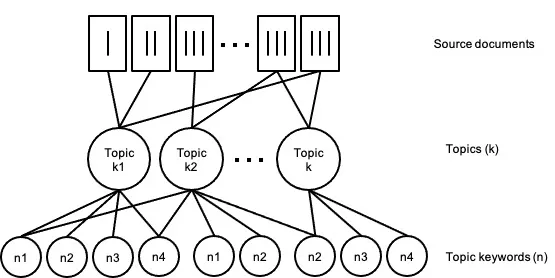

## **1.Import required libraries and modules**

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from nltk import pos_tag



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **2. Load and preprocess the dataset**
For the application of LDA, a collection of documents is required. In this instance, we will utilize the example dataset made available through the Gensim library.

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('scopus.csv')

In [4]:
document=df['Title']
document

0      A perspective on computational research suppor...
1      Handbook of research on artificial intelligenc...
2      Teaching beginner-level computational social s...
3      Early prediction of student engagement in virt...
4      mdx: A Cloud Platform for Supporting Data Scie...
                             ...                        
352                               One health informatics
353    Quantifying the link between art and property ...
354    Efficiency Improvements in Social Network Comm...
355           Predicting iPhone Sales from iPhone Tweets
356    WebSci 2016 - Proceedings of the 2016 ACM Web ...
Name: Title, Length: 357, dtype: object

Preprocessing steps include tokenization, removal of stopwords, and lemmatization.

In [5]:
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

def preprocess_data(documents):
    # Define the list of stopwords in English
    stop_words = stopwords.words('english')
    
    # Tokenize the documents and remove stopwords
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in document]
    
    # Return the list of tokenized and preprocessed texts
    return texts


In [6]:
# Process the documents using the previously defined preprocessing function
processed_texts = preprocess_data(document)
processed_texts


[['perspective',
  'computational',
  'research',
  'support',
  'programs',
  'library',
  'years',
  'data',
  'stanford',
  'university',
  'libraries'],
 ['handbook',
  'research',
  'artificial',
  'intelligence',
  'applications',
  'literary',
  'works',
  'social',
  'media'],
 ['teaching',
  'beginner',
  'level',
  'computational',
  'social',
  'science',
  'interactive',
  'open',
  'education',
  'resources',
  'learnr',
  'shiny',
  'apps'],
 ['early',
  'prediction',
  'student',
  'engagement',
  'virtual',
  'learning',
  'environments',
  'using',
  'machine',
  'learning',
  'techniques'],
 ['mdx',
  'cloud',
  'platform',
  'supporting',
  'data',
  'science',
  'cross',
  'disciplinary',
  'research',
  'collaborations'],
 ['charting',
  'course',
  'smartphones',
  'wearables',
  'transform',
  'population',
  'health',
  'research'],
 ['detecting',
  'risk',
  'withdrawal',
  'students',
  'stem',
  'social',
  'science',
  'courses',
  'using',
  'predictive',
 

## **3. Create a dictionary and a corpus**

The dictionary serves as a link between words and their respective integer identifiers, and the corpus consists of a collection of documents, each depicted in the form of a bag-of-words (BoW).

The `id2word` variable is assigned a `Dictionary` object from the `corpora` module. This object will map unique identifiers to words present in the `processed_texts`, which contains the preprocessed documents. Essentially, this dictionary facilitates the conversion of text documents into a bag-of-words format, which is required for subsequent modeling with LDA.


In [7]:
# Create Dictionary
id2word = corpora.Dictionary(processed_texts)


In [8]:
# Create Corpus
texts = processed_texts
texts

[['perspective',
  'computational',
  'research',
  'support',
  'programs',
  'library',
  'years',
  'data',
  'stanford',
  'university',
  'libraries'],
 ['handbook',
  'research',
  'artificial',
  'intelligence',
  'applications',
  'literary',
  'works',
  'social',
  'media'],
 ['teaching',
  'beginner',
  'level',
  'computational',
  'social',
  'science',
  'interactive',
  'open',
  'education',
  'resources',
  'learnr',
  'shiny',
  'apps'],
 ['early',
  'prediction',
  'student',
  'engagement',
  'virtual',
  'learning',
  'environments',
  'using',
  'machine',
  'learning',
  'techniques'],
 ['mdx',
  'cloud',
  'platform',
  'supporting',
  'data',
  'science',
  'cross',
  'disciplinary',
  'research',
  'collaborations'],
 ['charting',
  'course',
  'smartphones',
  'wearables',
  'transform',
  'population',
  'health',
  'research'],
 ['detecting',
  'risk',
  'withdrawal',
  'students',
  'stem',
  'social',
  'science',
  'courses',
  'using',
  'predictive',
 

In [9]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

## **4. Train the LDA model**

Choose the number of topics you want to generate and train the LDA model.

In [10]:
# Set number of topics
num_topics = 10

In [11]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)


## **5. Display topics and their keywords**

In [12]:
# Print the keywords for each topic
pprint(lda_model.print_topics())

[(0,
  '0.025*"data" + 0.023*"science" + 0.017*"social" + 0.010*"study" + '
  '0.010*"industry" + 0.008*"intelligence" + 0.007*"human" + '
  '0.007*"challenges" + 0.007*"issues" + 0.007*"large"'),
 (1,
  '0.070*"data" + 0.046*"science" + 0.022*"big" + 0.016*"based" + '
  '0.015*"social" + 0.011*"research" + 0.010*"ai" + 0.010*"mining" + '
  '0.008*"workshop" + 0.008*"networks"'),
 (2,
  '0.047*"social" + 0.036*"science" + 0.030*"data" + 0.028*"computational" + '
  '0.018*"sciences" + 0.014*"research" + 0.012*"digital" + 0.010*"human" + '
  '0.008*"analysis" + 0.008*"big"'),
 (3,
  '0.037*"social" + 0.035*"data" + 0.014*"analysis" + 0.014*"based" + '
  '0.012*"science" + 0.009*"analytics" + 0.009*"learning" + 0.009*"studies" + '
  '0.009*"big" + 0.009*"sciences"'),
 (4,
  '0.043*"data" + 0.034*"science" + 0.022*"social" + 0.016*"big" + '
  '0.009*"research" + 0.009*"smart" + 0.007*"towards" + 0.006*"quantifying" + '
  '0.006*"framework" + 0.006*"interactions"'),
 (5,
  '0.022*"data" + 0

## **6. Evaluate the model using the coherence score**

Coherence measures the degree of semantic similarity between high scoring words in the topic. There are various ways to measure coherence, and one of the most popular is the 'c_v' measure. Higher coherence scores indicate a better model.

In [13]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.4678192729933005


A coherence score of 0.47 typically indicates a moderate level of coherence for the topics generated by the LDA model. Coherence scores range from 0 to 1, where higher scores correspond to more coherent topics that are semantically meaningful, with words in the same topic being more related to each other.

In practical terms, a score of 0.47 suggests that the topics are reasonably good at capturing meaningful patterns in the data, but there might still be room for improvement. For example, some topics might be well defined and others less so, or some words within topics might not fit as well as others.

In topic modeling, coherence scores can be somewhat subjective and should be interpreted in the context of the application. It's often useful to compare coherence scores across different models or different numbers of topics to find the best model for your specific dataset and use case.

## **7. Visualize the topics**

To visualize the topics, you can use the pyLDAvis library (install using pip install pyLDAvis). This library provides an interactive visualization of the topics and their keywords.

In [16]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [18]:
from gensim.corpora import Dictionary

# Assuming 'processed_texts' is your list of tokenized and preprocessed documents
dictionary = Dictionary(processed_texts)


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.008236  0.063208       1        1  15.591888
8     -0.101866 -0.114520       2        1  14.181318
6      0.116950 -0.090154       3        1  12.016109
2     -0.033125 -0.069535       4        1  11.628030
3     -0.105135  0.057379       5        1  10.075665
7      0.029876  0.044997       6        1   9.271459
5      0.070616  0.015766       7        1   8.248465
9      0.040367  0.033761       8        1   6.478876
4      0.004276  0.006560       9        1   6.386663
0     -0.013723  0.052538      10        1   6.121529, topic_info=             Term       Freq      Total Category  logprob  loglift
17         social  70.000000  70.000000  Default  30.0000  30.0000
0   computational  19.000000  19.000000  Default  29.0000  29.0000
27        science  83.000000  83.000000  Default  28.0000  28.0000
34        machine  12.000000  12.000000  Default  27.0000  27.0000
14   intelligence   9.000000   9.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
69      librarian   0.650931   1.894165  Topic10  -5.6768   1.7252
74         skills   0.650930   1.962487  Topic10  -5.6768   1.6898
72     perception   0.650930   2.043475  Topic10  -5.6768   1.6494
73      platforms   0.650930   3.543570  Topic10  -5.6768   1.0989
68        factors   0.650930   3.359812  Topic10  -5.6768   1.1521

[633 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
86        1  0.207522  academic
86        4  0.207522  academic
86        5  0.207522  academic
86        9  0.207522  academic
1160      6  0.729534   academy
...     ...       ...       ...
350       5  0.270866  workshop
350       6  0.135433  workshop
201       4  0.704907    worlds
906       4  0.704907     worth
907       4  0.930235      year

[920 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 7, 3, 4, 8, 6, 10, 5, 1])

## **8. Conclusion**

To sum up, this tutorial has walked you through the process of developing a Latent Dirichlet Allocation (LDA) model with Python's Gensim library. The steps outlined in this guide will enable to unearth the underlying thematic framework in a set of documents, as the model groups words into topics. We've gone over everything from setting up your environment, importing necessary libraries, to preprocessing data, forming a dictionary and corpus, to training and interpreting the LDA model, assessing its coherence, and visualizing the results with pyLDAvis. Armed with these skills, you can harness LDA for a variety of text analysis applications, deriving meaningful insights from extensive textual data.

References:
https://bennett-holiday.medium.com/a-step-by-step-guide-to-writing-an-lda-program-in-python-690aa99119ea